<a href="https://colab.research.google.com/github/lucianoh34/RecPadroes/blob/main/lhr_KMeans_X_Knn_Load_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementação do professor (aula do video)

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:4]
y = data.target
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

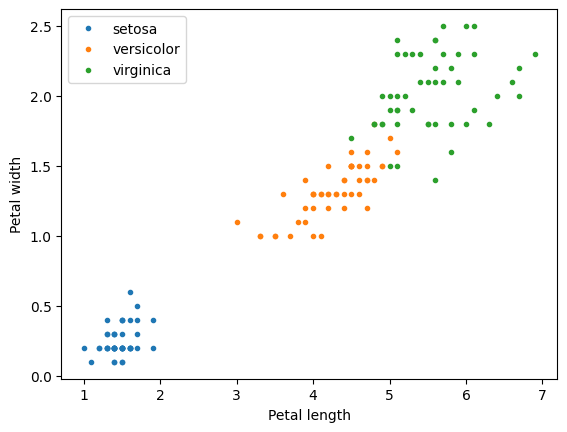

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(set(y))):
  plt.plot(X[y==i,0], X[y==i,1], ".", label=data.target_names[i])

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

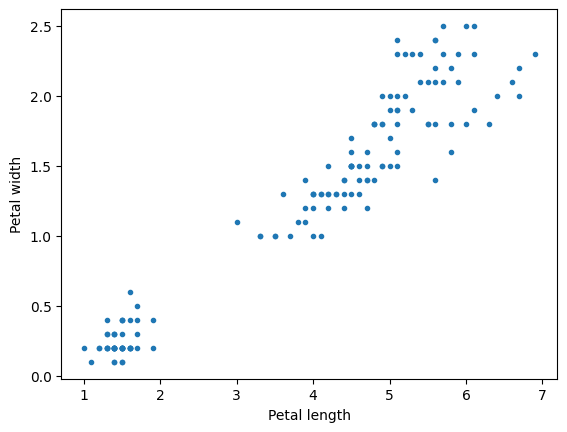

In [ ]:
plt.scatter(X[:,0], X[:,1], marker=".")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

[[4.29259259 1.35925926]
 [1.462      0.246     ]
 [5.62608696 2.04782609]]


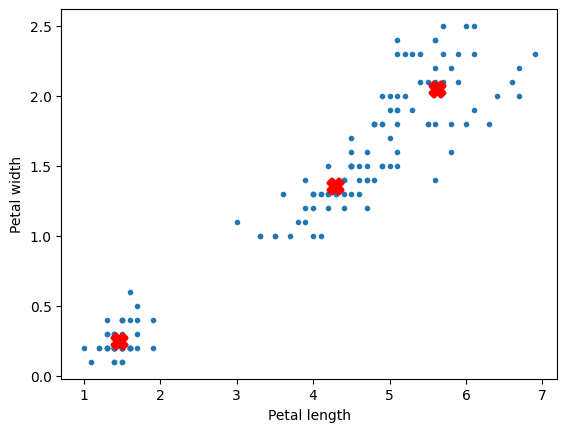

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class KMeans(BaseEstimator, ClusterMixin, TransformerMixin):
  def __init__(self, n_clusters=3):
    self.n_clusters = n_clusters

  def _init_centroids(self, X):
    min = np.min(X, axis=0)
    max = np.max(X, axis=0)
    centroids = []
    for i in range(self.n_clusters):
      centroid = []
      for j in range(X.shape[1]):
        centroid.append(random.uniform(min[j], max[j]))
      centroids.append(centroid)
    self.clusters_centers_ = np.array(centroids)

  def fit(self, X, y=None):
    self._init_centroids(X)
    ypred = self.predict(X)
    previous_centroids = self.clusters_centers_.copy()
    while True:
      ypred = self.predict(X)
      for i in range(self.n_clusters):
        if np.any(ypred==i):
          self.clusters_centers_[i] = np.mean(X[ypred==i], axis=0)
      if np.allclose(previous_centroids, self.clusters_centers_, atol=0.0001):
        break
      previous_centroids = self.clusters_centers_.copy()

  def _distancias(self, X):
    diferenca = self.clusters_centers_ - X
    quadrado = diferenca ** 2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz

  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self._distancias(X[i])
      centroid = np.argmin(distancias)
      ypred[i] = centroid
    return ypred

kmeans = KMeans()
kmeans.fit(X)
print(kmeans.clusters_centers_)

plt.scatter(X[:,0], X[:,1], marker=".")
plt.scatter(kmeans.clusters_centers_[:,0],kmeans.clusters_centers_[:,1],
            marker="X", color="r", s=100, linewidths=3)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

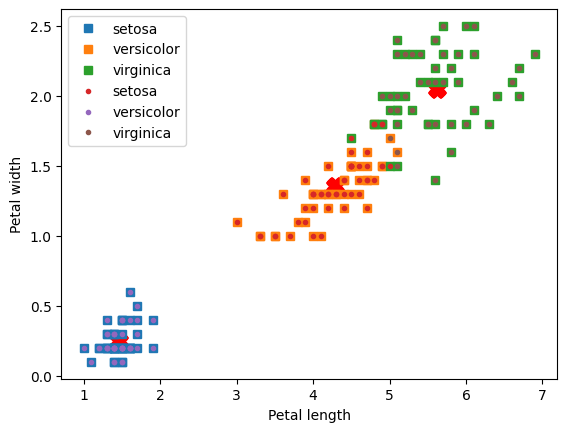

In [ ]:
for i in range(len(set(y))):
  plt.plot(X[y==i,0], X[y==i,1], "s", label=data.target_names[i])
  plt.scatter(kmeans.clusters_centers_[:,0],kmeans.clusters_centers_[:,1],
            marker="X", color="r", s=100, linewidths=3)

ypred = kmeans.predict(X)
for i in range(len(set(ypred))):
  plt.plot(X[ypred==i,0], X[ypred==i,1], ".", label=data.target_names[i])


plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

### Exercício - Comparação do resultado de uma predição usando o KMeans e o KNN.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

dataset = load_iris()
X = dataset.data[:,2:4]
y = dataset.target
dataset.target_names
X.shape, y.shape

((150, 2), (150,))

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

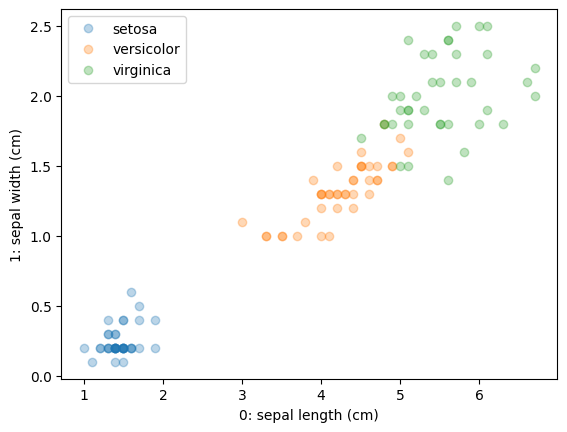

In [ ]:
import matplotlib.pyplot as plt
i, j = 0, 1
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(ytr):
  plt.plot(Xtr[:,i][ytr==k], Xtr[:,j][ytr==k], "o", alpha=0.3,
           label=f"{dataset.target_names[k]}")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = 3
      ypred[i] = self.y[vizinho]
    return ypred


In [ ]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(Xtr, ytr)
accuracy_score(ytr, modelo.predict(Xtr)), accuracy_score(yte, modelo.predict(Xte))

(0.3333333333333333, 0.3333333333333333)

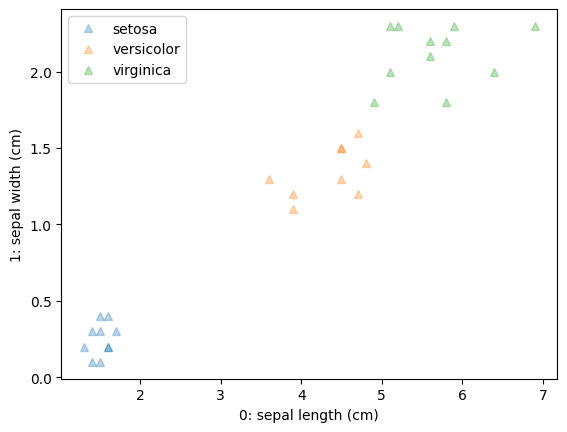

In [ ]:
import matplotlib.pyplot as plt
i, j = 0, 1
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in range(len(set(yte))):
  plt.plot(Xte[:,i][yte==k], Xte[:,j][yte==k], "^", alpha=0.3,
           label=f"{dataset.target_names[k]}")
plt.legend()
plt.show()

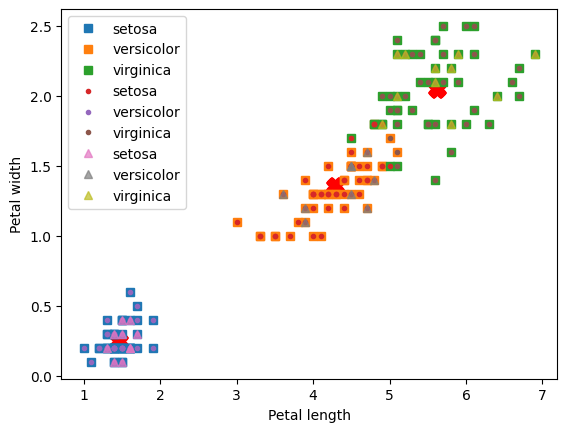

In [ ]:
for i in range(len(set(y))):
  plt.plot(X[y==i,0], X[y==i,1], "s", label=data.target_names[i])
  plt.scatter(kmeans.clusters_centers_[:,0],kmeans.clusters_centers_[:,1],
            marker="X", color="r", s=100, linewidths=3)

ypred = kmeans.predict(X)
for i in range(len(set(ypred))):
  plt.plot(X[ypred==i,0], X[ypred==i,1], ".", label=data.target_names[i])

i, j = 0, 1
for k in range(len(set(yte))):
  plt.plot(Xte[:,i][yte==k], Xte[:,j][yte==k], "^", alpha=0.7,
           label=f"{dataset.target_names[k]}")


plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()